## Text Classification with LSTM 
# Mantas Macionis
# C00242178

This is a Demo Notebook based on a Long Short Term Memory recurrent neural network Network, The process outlined in this notebook was retrieved from a demo notebook on IMDB movie review classification, created by kaggle user tientd95 and downloaded from [Kaggle Link](https://www.kaggle.com/code/tientd95/deep-learning-for-sentiment-analysis/notebook)

The purpose of editing this notebook is to get a better understanding of the models being used, how they function, and as a result, the scenarios, datatypes and parameter changes which they are most suited for.

## Changelog 
- Accuracy Score observed for original notebook: (90%)
- Loaded in preprocessed twitter comment dataset, originally retrieved from [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140)
- Mapped new positive and negative values (0 negative, 1 positive)
- Tokenized dataset words
- specified a test set and LSTM model parameters
- Compiled and trained the model
- Observed (79%) accuracy score, lower then original, but using larger, less refined dataset.
- Attempting to increase accuracy by adding another LSTM layer, a dropout layer, using bidirectional LSTM 
- Train model again and add an architecture visualisation
- Observed (79%) accuracy, indicating the dataset is the limitation in the accuracy, potentially due to only having Positive/Negative labels
- outputted a confusion matrix for predictions
- saved model as .h5 file for later deployement example

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

<h2>Loading Dataset and Mapping labels</h2>

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/update2.csv')

# Ensure there are no NaN values in the 'text' column
df = df.dropna(subset=['text'])

# Map target to 0 for negative and 1 for positive for binary classification
df['target'] = df['target'].map({0: 0, 4: 1})

<ipython-input-2-ebeba94e53e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({0: 0, 4: 1})


<h2>Tokenization</h2>

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit to 10000 words
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
data = pad_sequences(sequences, maxlen=100)  # all sequences have the same length


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, df['target'], test_size=0.2, random_state=42)


<h2>Specifying Model Structure</h2>

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))  # Embedding layer
model.add(LSTM(32))  # LSTM layer with 32 units
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<h2>Training the model</h2>

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)


Epoch 1/5
9953/9953 [==============================] - 115s 11ms/step - loss: 0.4628 - accuracy: 0.7802 - val_loss: 0.4474 - val_accuracy: 0.7902
Epoch 2/5
9953/9953 [==============================] - 81s 8ms/step - loss: 0.4359 - accuracy: 0.7958 - val_loss: 0.4409 - val_accuracy: 0.7933
Epoch 3/5
9953/9953 [==============================] - 84s 8ms/step - loss: 0.4234 - accuracy: 0.8029 - val_loss: 0.4387 - val_accuracy: 0.7958
Epoch 4/5
9953/9953 [==============================] - 80s 8ms/step - loss: 0.4127 - accuracy: 0.8088 - val_loss: 0.4401 - val_accuracy: 0.7951
Epoch 5/5
9953/9953 [==============================] - 80s 8ms/step - loss: 0.4030 - accuracy: 0.8142 - val_loss: 0.4437 - val_accuracy: 0.7948


In [ ]:
# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

9953/9953 [==============================] - 40s 4ms/step - loss: 0.4437 - accuracy: 0.7948
Loss: 0.4436582326889038, Accuracy: 0.7947568297386169


<h2>Accuracy 79%, no improvement from original example</h2>

<h2>Create some sample tweets to test the models effectiveness</h2>

In [ ]:
# Example sentences
sentences = ["She's enjoying her new role", "He's not the happiest person when he's hungry", "I could eat a horse I'm so hungry.", "Compared to the previous version, this app crashes less often."]

# Preprocess sentences (tokenization, padding)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=100)

# Predict sentiment
predictions = model.predict(padded_sequences)

# Print predictions
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}\nPredicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}\n")


1/1 [==============================] - 1s 710ms/step
Sentence: She's enjoying her new role
Predicted Sentiment: Positive

Sentence: He's not the happiest person when he's hungry
Predicted Sentiment: Positive

Sentence: I could eat a horse I'm so hungry.
Predicted Sentiment: Negative

Sentence: Compared to the previous version, this app crashes less often.
Predicted Sentiment: Negative



<h2>Changes to model to try and improve accuracy:</h2>
- Increased embedding dimensions<br>
- added bidirectional LSTM<br>
- added a dropout layer<br>
- added and additional LSTM layer for more complex patterns 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          66048     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 726689 (2.77 MB)
Trainable params: 726689 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

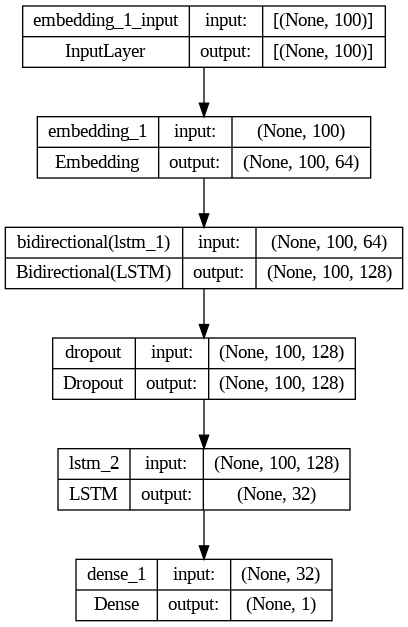

In [ ]:
from keras.layers import Bidirectional, Dropout
from tensorflow.keras.utils import plot_model

### Modify the model architecture
model_enhanced = Sequential()
model_enhanced.add(Embedding(10000, 64, input_length=100))  # Increased embedding dimensions
model_enhanced.add(Bidirectional(LSTM(64, return_sequences=True)))  # Bidirectional LSTM
model_enhanced.add(Dropout(0.5))  # Dropout for regularization
model_enhanced.add(LSTM(32))  # Additional LSTM layer to capture more complex patterns
model_enhanced.add(Dense(1, activation='sigmoid'))  # Output layer

### Compile the model
model_enhanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model Summary
print(model_enhanced.summary())

### Train the enhanced model
history_enhanced = model_enhanced.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

### Evaluate the enhanced model
evaluation_enhanced = model_enhanced.evaluate(X_test, y_test)
print(f'Enhanced Model - Loss: {evaluation_enhanced[0]}, Accuracy: {evaluation_enhanced[1]}')

### Visualize the model architecture
plot_model(model_enhanced, to_file='model_enhanced.png', show_shapes=True, show_layer_names=True)


<h2>Accuracy did not show an increase, indicating dataset is the limitation</h2>

<h2>Output a confusion matrix </h2>

9953/9953 [==============================] - 63s 6ms/step


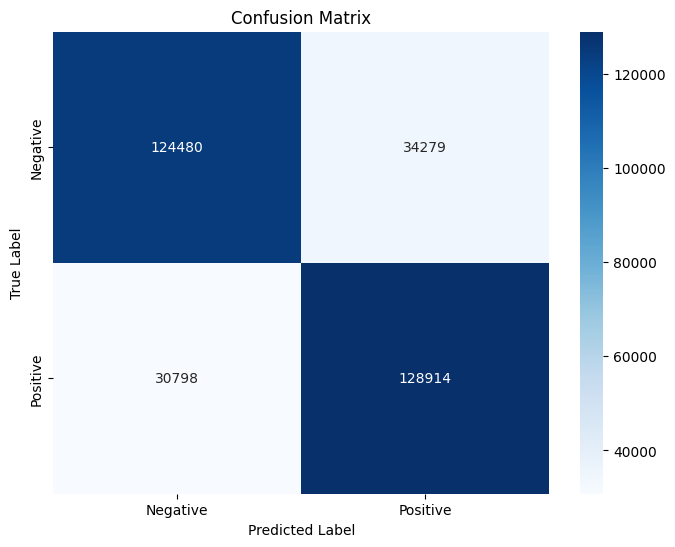

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Predict the labels on the test dataset
y_pred = model_enhanced.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

### Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

### Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


<h2>Save model for deployment example</h2>

In [ ]:
model_path = '/content/drive/MyDrive/sentiment_analysis_model.h5'
weights_path = '/content/drive/MyDrive/sentiment_analysis_weights.h5'

### Save the entire model to a HDF5 file
model_enhanced.save(model_path)

### Save just the weights
model_enhanced.save_weights(weights_path)

### Print a confirmation
print("Model and weights have been saved successfully to Google Drive.")


Model and weights have been saved successfully to Google Drive.
